# Notebook 2: Exploratory Data Analysis

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
data = pd.read_csv('data/clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [18]:
# Group by diagnosis and review the output.
diag_gr = data.groupby('diagnosis', axis=0)
pd.DataFrame(diag_gr.size(), columns=['# of observations'])

,# of observations
diagnosis,
B,357
M,212


# Converting Categorical Features

In [19]:
diagnosis = pd.get_dummies(data['diagnosis'],drop_first=True,dtype=float)

In [20]:
data.drop(['diagnosis'],axis=1,inplace=True)

In [21]:
data = pd.concat([data,diagnosis],axis=1)

In [22]:
data= data.rename(columns = {'M': 'diagnosis'})

In [23]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1.0


In [24]:
data['diagnosis'].value_counts()

diagnosis
0.0    357
1.0    212
Name: count, dtype: int64

#  Unimodal Data Visualizations



Apply 3 techniques that we can use to understand each attribute of your dataset independently.
* Histograms.
* Box Plots.
* Pair plots.

***Histogram the "_mean" suffix designition***

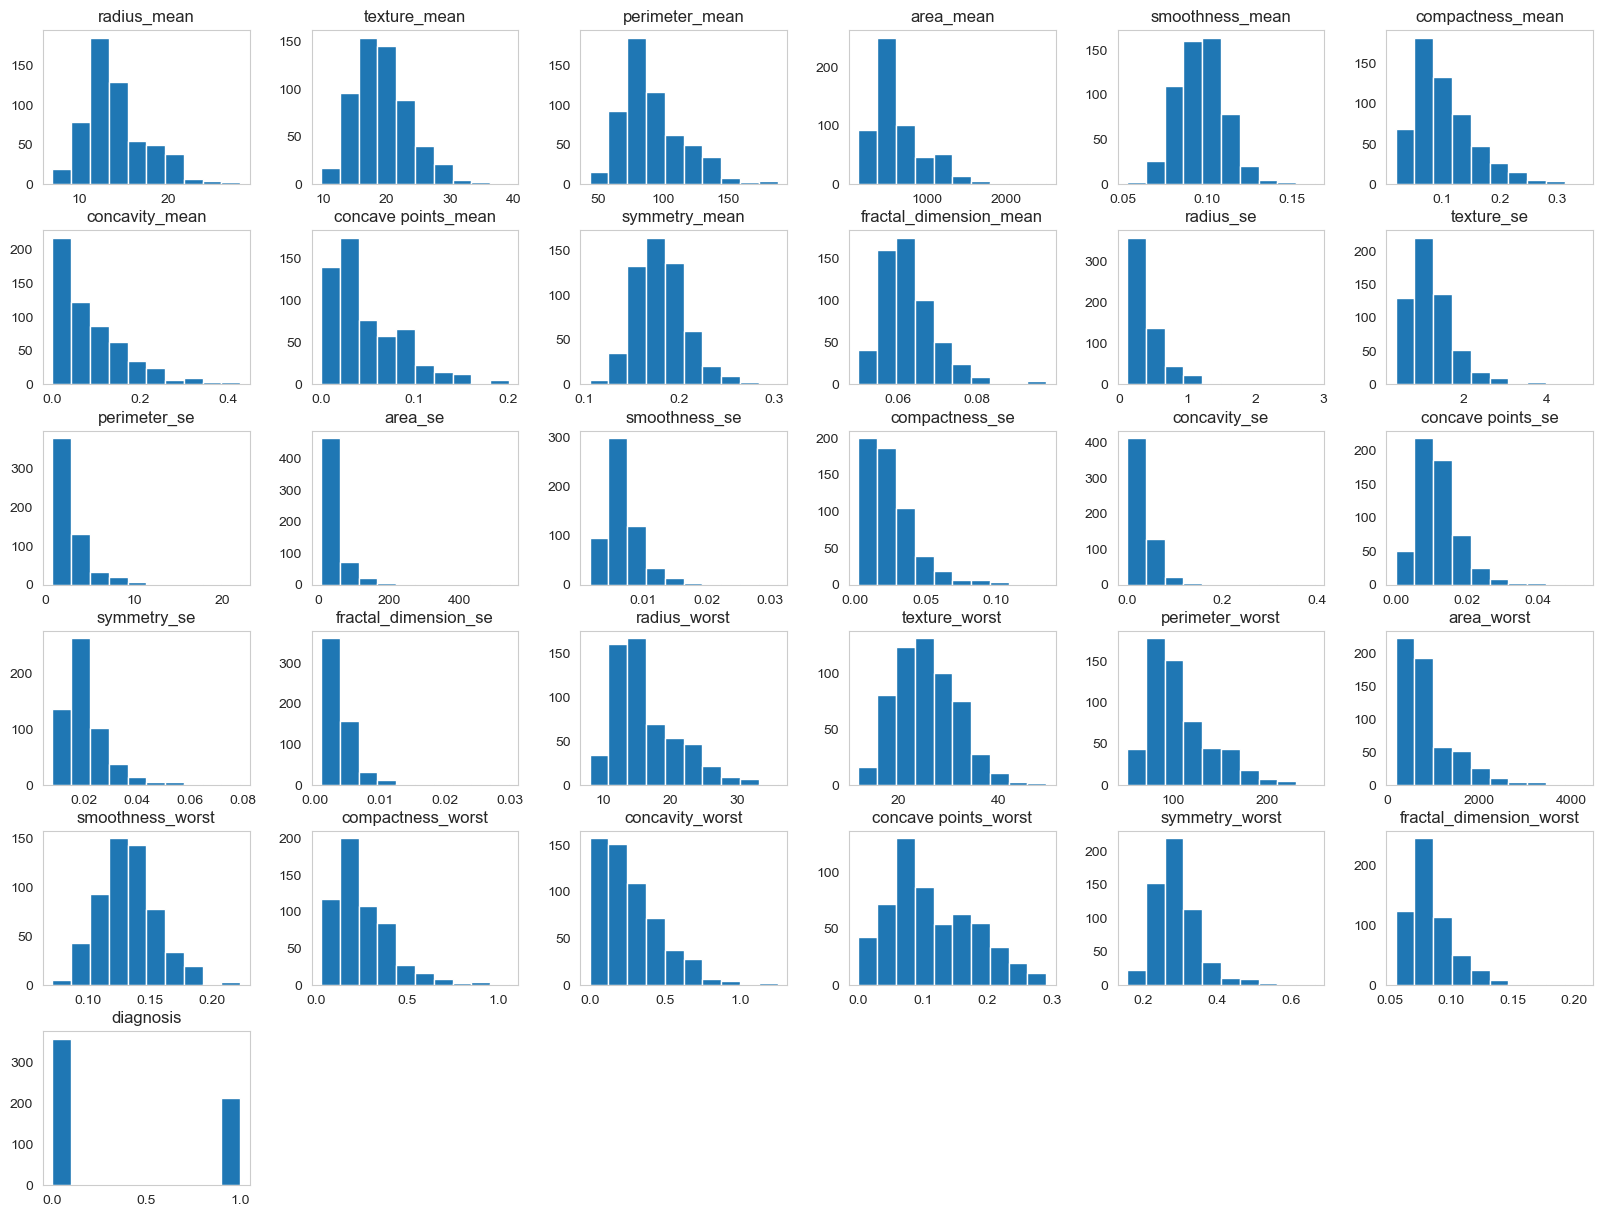

In [25]:
hist_mean = data.hist(bins=10, figsize=(20,15), grid=False)
plt.show()

***Box plot  designition***

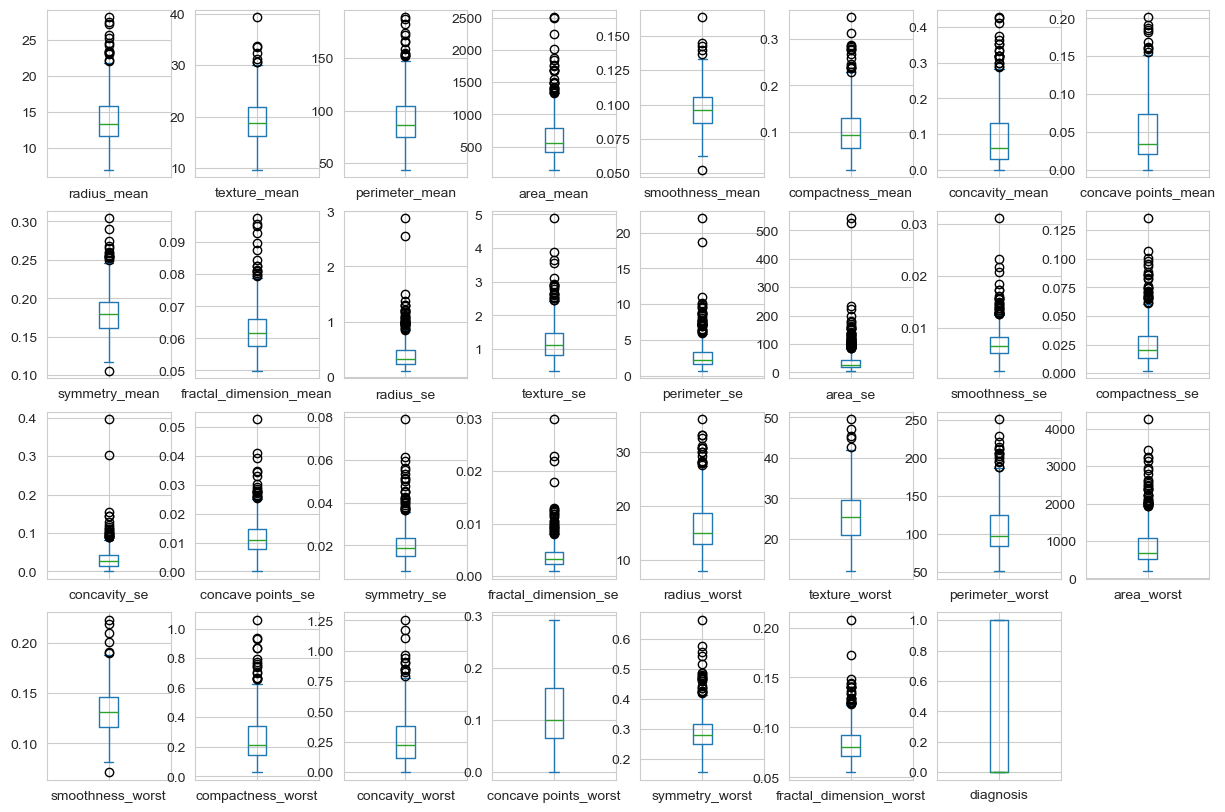

In [26]:
# box plots
plt=data.plot(kind= 'box' , subplots=True, sharex=False, sharey=False,figsize=(15,10), layout=(4,8),)

<Axes: xlabel='diagnosis', ylabel='count'>

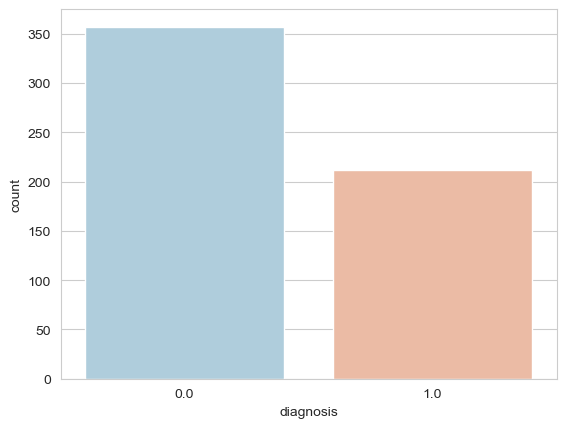

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='diagnosis',data=data,palette='RdBu_r')

In [ ]:
sns.pairplot(data,hue='diagnosis')

C:\Users\shaki\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


# plot correlation matrix

In [ ]:
from matplotlib import pyplot as plt
data = pd.read_csv('data/clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
data=data.drop('diagnosis',axis=1)
corr = data.corr()
# Set up the matplotlib figure
data, ax = plt.subplots(figsize=(20,20))
plt.title('Breast Cancer Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1.2, square='square', cmap=cmap,annot=True, 
            ax=ax, fmt='.2g',linewidths=2)